In [127]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [248]:
url = 'https://raw.githubusercontent.com/ferdinjoe/DSA206/main/carrental%202019.csv'
data = pd.read_csv(url)
data

,created_at,order_id,rent_channel,payment_method,car,car__owner__user_status,car__brand,car__model,rental_category,total_period,...,discount_amount,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding,status,confirm_at,complete_at,cancel_at
0,12/31/2019 19:34,DM5427-26129,ios,credit,5427:Mini Countryman,private,Mini,Countryman,car,5.0,...,0.0,0.0,0.0,42693.0,0,0.0,complete,12/31/2019 20:46,1/7/2020 22:44,NaN
1,12/31/2019 14:02,DM5619-26120,web,transfer,5619:Honda City,private,Honda,City,car,2.0,...,0.0,300.0,0.0,1999.2,5000,98.0,complete,48:18.7,15:30.3,NaN
2,12/31/2019 9:37,DM6425-26102,web,transfer,6425:Mazda 2,private,Mazda,2,car,1.0,...,0.0,0.0,0.0,1048.6,5000,0.0,complete,48:50.6,48:31.4,NaN
3,12/30/2019 23:05,DM6010-26093,ios,credit,6010:Toyota Yaris,local,Toyota,Yaris,car,1.0,...,0.0,0.0,0.0,1358.9,0,0.0,complete,06:24.2,28:00.5,NaN
4,12/30/2019 20:28,DM1907-26090,web,credit,1907:Toyota Vios,private,Toyota,Vios,car,2.0,...,0.0,300.0,0.0,2203.2,0,108.0,complete,38:36.1,15:30.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199,1/4/2019 16:01,DM2551-11316,web,credit,2551:Mitsubishi Attrage,private,Mitsubishi,Attrage,car,2.0,...,0.0,0.0,0.0,1990.2,10000,0.0,complete,1/4/2019 16:01,NaN,NaN
3200,1/4/2019 15:54,DM2551-11314,web,credit,2551:Mitsubishi Attrage,private,Mitsubishi,Attrage,car,3.0,...,0.0,0.0,0.0,2985.3,10000,0.0,complete,1/4/2019 15:54,NaN,NaN
3201,1/4/2019 8:31,DM3984-11303,web,transfer,3984:Toyota Vios,local,Toyota,Vios,car,2.0,...,0.0,0.0,0.0,2889.0,5000,0.0,complete,1/4/2019 8:31,NaN,NaN
3202,1/2/2019 16:06,DM3477-11297,ios,credit,3477:Mini Cooper Hatch 3 door,private,Mini,Cooper Hatch 3 door,car,1.0,...,0.0,0.0,0.0,6077.6,20000,0.0,complete,1/2/2019 16:06,NaN,NaN


In [3]:
data.isnull().sum()

created_at                    0
order_id                      0
rent_channel                  0
payment_method                3
car                          83
car__owner__user_status      83
car__brand                   83
car__model                   83
rental_category               9
total_period                  0
price_per_day                 0
total_price                   0
insurance_price               1
insurance_amount              0
vat_amount                    0
commission                    0
discount_amount               1
promotion_amount              0
redeem_amount                 1
total_amount                  0
hold_amount                   0
tax_withholding               1
status                        0
confirm_at                    0
complete_at                1100
cancel_at                  2929
dtype: int64

In [4]:
df = data.copy()

In [5]:
df.head(5)


,created_at,order_id,rent_channel,payment_method,car,car__owner__user_status,car__brand,car__model,rental_category,total_period,...,discount_amount,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding,status,confirm_at,complete_at,cancel_at
0,12/31/2019 19:34,DM5427-26129,ios,credit,5427:Mini Countryman,private,Mini,Countryman,car,5.0,...,0.0,0.0,0.0,42693.0,0,0.0,complete,12/31/2019 20:46,1/7/2020 22:44,NaN
1,12/31/2019 14:02,DM5619-26120,web,transfer,5619:Honda City,private,Honda,City,car,2.0,...,0.0,300.0,0.0,1999.2,5000,98.0,complete,48:18.7,15:30.3,NaN
2,12/31/2019 9:37,DM6425-26102,web,transfer,6425:Mazda 2,private,Mazda,2,car,1.0,...,0.0,0.0,0.0,1048.6,5000,0.0,complete,48:50.6,48:31.4,NaN
3,12/30/2019 23:05,DM6010-26093,ios,credit,6010:Toyota Yaris,local,Toyota,Yaris,car,1.0,...,0.0,0.0,0.0,1358.9,0,0.0,complete,06:24.2,28:00.5,NaN
4,12/30/2019 20:28,DM1907-26090,web,credit,1907:Toyota Vios,private,Toyota,Vios,car,2.0,...,0.0,300.0,0.0,2203.2,0,108.0,complete,38:36.1,15:30.5,NaN


In [ ]:
df.dropna(subset = ["car"], inplace=True)
df.drop(columns=['complete_at','cancel_at','confirm_at','hold_amount','tax_withholding'],inplace=True) 
df.isnull().sum()

In [201]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df.isnull().sum()

created_at                 0
order_id                   0
rent_channel               0
payment_method             0
car                        0
car__owner__user_status    0
car__brand                 0
car__model                 0
rental_category            0
total_period               0
price_per_day              0
total_price                0
insurance_price            0
insurance_amount           0
vat_amount                 0
commission                 0
discount_amount            0
promotion_amount           0
redeem_amount              0
total_amount               0
status                     0
Dates                      0
Time                       0
year                       0
month                      0
day_name                   0
car_num                    0
car_name                   0
day                        0
dtype: int64

In [202]:
#Transform string to date
from datetime import date
df['created_at'] = pd.to_datetime(df.created_at)
df['Dates'] = pd.to_datetime(df['created_at']).dt.date
df['Time'] = pd.to_datetime(df['created_at']).dt.time

In [240]:
df['year'] = df['created_at'].dt.year
df['month'] = df['created_at'].dt.month
df['day_name'] =df['created_at'].dt.day_name()



In [243]:
df.head()

,created_at,order_id,rent_channel,payment_method,car,car__owner__user_status,car__brand,car__model,rental_category,total_period,...,total_amount,status,Dates,Time,year,month,day_name,car_num,car_name,day
0,2019-12-31 19:34:00,DM5427-26129,ios,credit,5427:Mini Countryman,private,Mini,Countryman,car,5.0,...,42693.0,complete,2019-12-31,19:34:00,2019,12,Tuesday,5427,Mini Countryman,31
1,2019-12-31 14:02:00,DM5619-26120,web,transfer,5619:Honda City,private,Honda,City,car,2.0,...,1999.2,complete,2019-12-31,14:02:00,2019,12,Tuesday,5619,Honda City,31
2,2019-12-31 09:37:00,DM6425-26102,web,transfer,6425:Mazda 2,private,Mazda,2,car,1.0,...,1048.6,complete,2019-12-31,09:37:00,2019,12,Tuesday,6425,Mazda 2,31
3,2019-12-30 23:05:00,DM6010-26093,ios,credit,6010:Toyota Yaris,local,Toyota,Yaris,car,1.0,...,1358.9,complete,2019-12-30,23:05:00,2019,12,Monday,6010,Toyota Yaris,30
4,2019-12-30 20:28:00,DM1907-26090,web,credit,1907:Toyota Vios,private,Toyota,Vios,car,2.0,...,2203.2,complete,2019-12-30,20:28:00,2019,12,Monday,1907,Toyota Vios,30


In [205]:
# new data frame with split value columns
new = df['car'].str.split(":", n = 1, expand = True)
df["car_num"]= new[0]
df["car_name"]= new[1]

df.head()

,created_at,order_id,rent_channel,payment_method,car,car__owner__user_status,car__brand,car__model,rental_category,total_period,...,total_amount,status,Dates,Time,year,month,day_name,car_num,car_name,day
0,2019-12-31 19:34:00,DM5427-26129,ios,credit,5427:Mini Countryman,private,Mini,Countryman,car,5.0,...,42693.0,complete,2019-12-31,19:34:00,2019,12,Tuesday,5427,Mini Countryman,31
1,2019-12-31 14:02:00,DM5619-26120,web,transfer,5619:Honda City,private,Honda,City,car,2.0,...,1999.2,complete,2019-12-31,14:02:00,2019,12,Tuesday,5619,Honda City,31
2,2019-12-31 09:37:00,DM6425-26102,web,transfer,6425:Mazda 2,private,Mazda,2,car,1.0,...,1048.6,complete,2019-12-31,09:37:00,2019,12,Tuesday,6425,Mazda 2,31
3,2019-12-30 23:05:00,DM6010-26093,ios,credit,6010:Toyota Yaris,local,Toyota,Yaris,car,1.0,...,1358.9,complete,2019-12-30,23:05:00,2019,12,Monday,6010,Toyota Yaris,30
4,2019-12-30 20:28:00,DM1907-26090,web,credit,1907:Toyota Vios,private,Toyota,Vios,car,2.0,...,2203.2,complete,2019-12-30,20:28:00,2019,12,Monday,1907,Toyota Vios,30


Which car brand is the most rented? 

In [206]:
car_brand = df.groupby('car__brand')['car__brand'].count()
car_brand.head(15)

car__brand
Audi               5
BMW              115
Bentley            2
Chevrolet         18
Ford              11
Honda            419
Hyundai          102
Isuzu              5
MG                23
Mazda            197
Mercedes Benz     33
Mini              22
Mitsubishi       125
Nissan           122
Other              2
Name: car__brand, dtype: int64

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


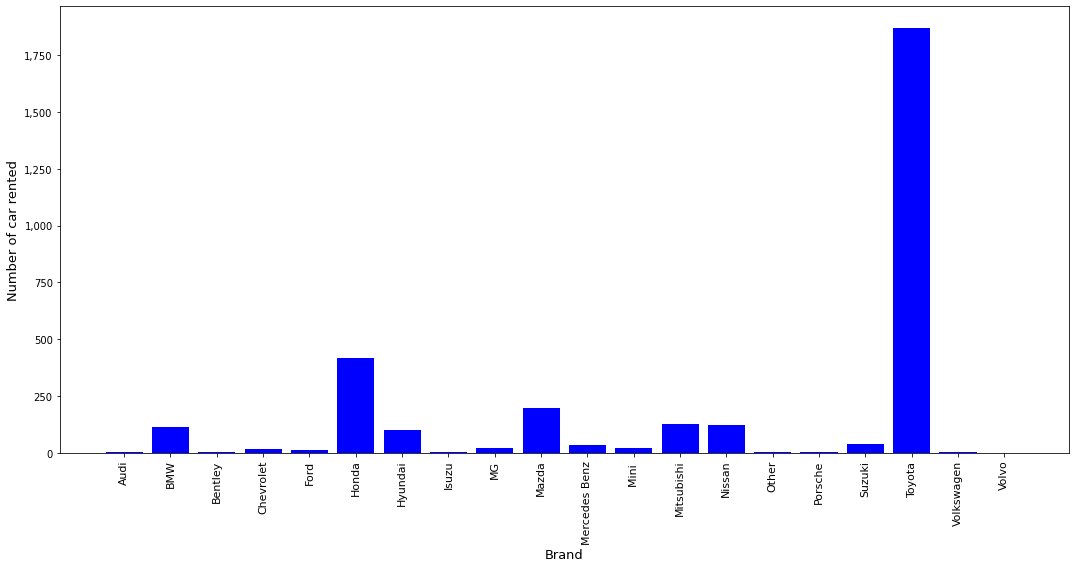

In [207]:
fig , ax = plt.subplots(figsize=(15,8))
brand = [car__brand for car__brand, df in df.groupby('car__brand')]
plt.bar(brand,car_brand,color='b')
plt.xlabel('Brand', fontsize = 13)
plt.xticks(brand)
plt.xticks(brand, rotation ='vertical', size=11)
plt.ylabel('Number of car rented', fontsize = 13)
plt.tight_layout()

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

We can see from the graph that Toyota has the highest number of rented car. Follow by Honda, Mazda, and Mitsubushi

In [208]:
contain_values = df[df['car_name'].str.contains('Toyota')]
car_toyota = contain_values.groupby('car_name')['car_name'].count()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


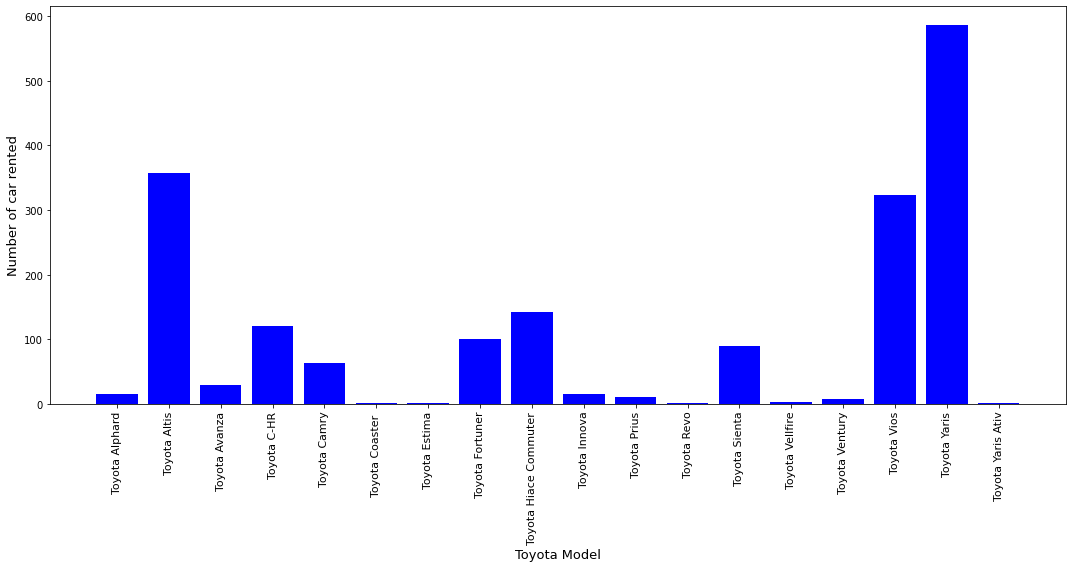

In [209]:
fig , ax = plt.subplots(figsize=(15,8))
model = [car_name for car_name, df in contain_values.groupby('car_name')]
plt.bar(model,car_toyota,color='b')
plt.xlabel('Toyota Model', fontsize = 13)
plt.xticks(model)
plt.xticks(model, rotation ='vertical', size=11)
plt.ylabel('Number of car rented', fontsize = 13)
plt.tight_layout()

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

And Toyota Yaris has the highest number of rented car follow by Toyota Atlis and Toyota Vios

In [210]:
results = df.groupby('car_name')['car_name'].count()
results.sort_values(ascending=False)

car_name
Toyota Yaris            586
Toyota Altis            358
Toyota Vios             324
Mazda 2                 186
Honda City              176
                       ... 
Ford Mustang 2.3T         1
Bentley Flying spur       1
Bentley Continental       1
BMW Series 7              1
Volvo S90                 1
Name: car_name, Length: 81, dtype: int64

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


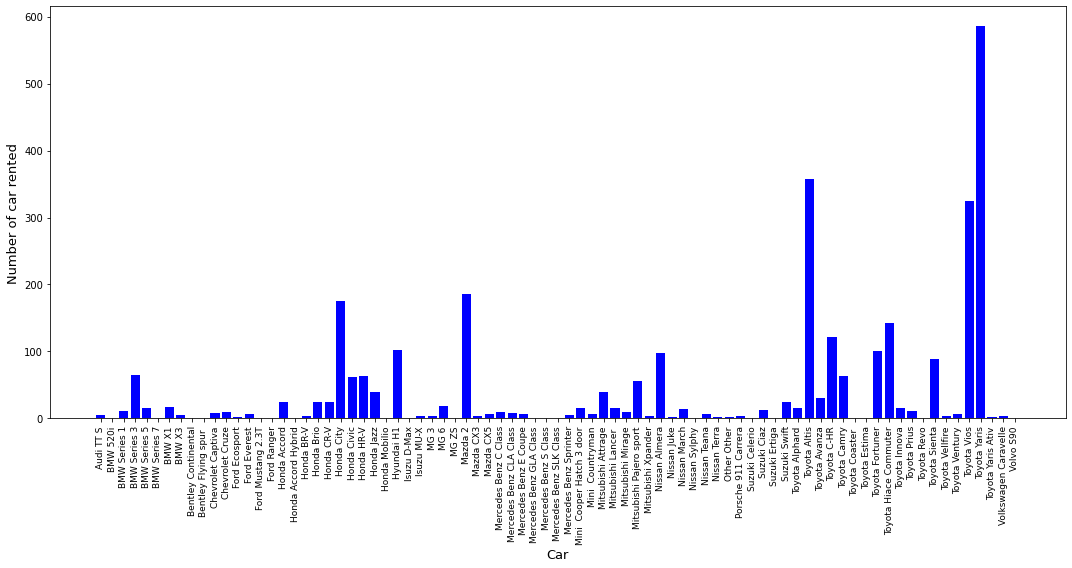

In [211]:
fig , ax = plt.subplots(figsize=(15,8))
cars = [car_name for car_name, df in df.groupby('car_name')] 
plt.bar(cars,results,color='b')
plt.xlabel('Car', fontsize = 13)
plt.xticks(cars)
plt.xticks(cars, rotation ='vertical', size=9)
plt.ylabel('Number of car rented', fontsize = 13)
plt.tight_layout()

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

Which month has the most sale?

In [212]:
month_sum = df.groupby(['month'])['total_amount'].sum()
month_sum

month
1     3.518395e+05
2     2.312002e+05
3     5.248230e+05
4     4.462360e+05
5     9.907123e+05
6     9.575080e+05
7     1.388374e+06
8     1.096813e+06
9     1.264719e+06
10    2.613209e+06
11    2.706139e+06
12    2.966995e+06
Name: total_amount, dtype: float64

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


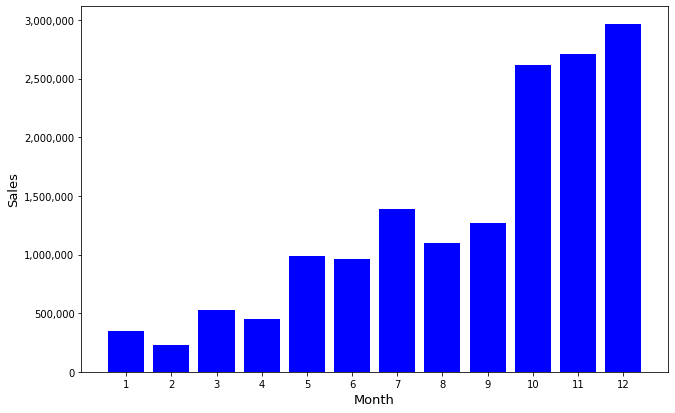

In [213]:
fig , ax = plt.subplots(figsize=(9,6))
months = range(1,13)
plt.bar(months,month_sum,color='b')
plt.xlabel('Month', fontsize = 13)
plt.xticks(months)
plt.ylabel('Sales', fontsize = 13)
plt.tight_layout()

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

In [214]:
prices = df.groupby('car__brand').mean()['price_per_day']
prices

car__brand
Audi              6300.000000
BMW               7106.720630
Bentley          28500.000000
Chevrolet         1311.111111
Ford              3172.500000
Honda             1269.600000
Hyundai           3507.679608
Isuzu             1599.600000
MG                 934.000000
Mazda             1009.421269
Mercedes Benz     8308.403939
Mini              4733.636364
Mitsubishi        1371.720000
Nissan             916.494180
Other            41250.825000
Porsche           7788.160000
Suzuki             774.250000
Toyota            1119.572526
Volkswagen        4000.000000
Volvo             9900.000000
Name: price_per_day, dtype: float64

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


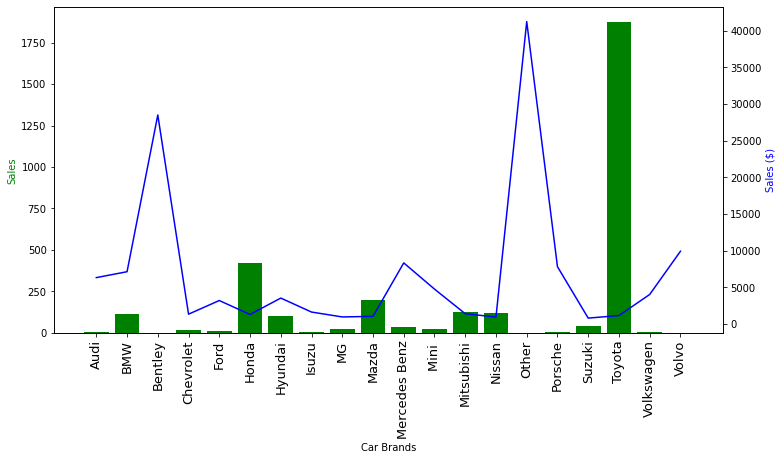

In [215]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax2 = ax1.twinx()
ax1.bar(brand,car_brand, color='g')
ax2.plot(brand,prices, 'b-')

ax1.set_xlabel('Car Brands')
ax1.set_ylabel('Sales', color='g')
ax2.set_ylabel('Sales ($)', color= 'b')
ax1.set_xticklabels(brand, rotation='vertical', size = 13)

plt.show()

Price per day of BMW, Mercedes Benz, or Porsche is quite high so that the number of rented car is less than other brnads

In [216]:
pie = df.groupby('rental_category')['rental_category'].count()
label = [rental_category for rental_category, df in df.groupby('rental_category')] 
label

['airport', 'car', 'driver']

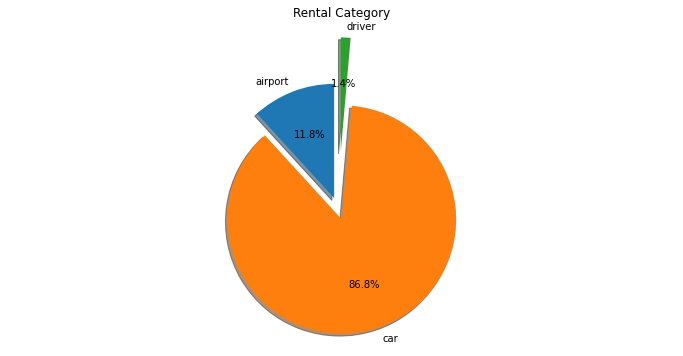

In [217]:

explode = (0.1, 0.1, 0.5)

fig, ax = plt.subplots(figsize = (12,6))
ax.pie(pie,
       explode=explode,
       labels=label,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Rental Category')


plt.show()

In [218]:
df['day'] = df['created_at'].dt.day
day_rental_summary = pd.pivot_table(df, values = ['total_period','total_amount'],index = ['Dates'], aggfunc=np.sum)

In [219]:
day_rental_summary

,total_amount,total_period
Dates,,
2019-01-02,23197.60,6.0
2019-01-04,7864.50,7.0
2019-01-05,27873.50,5.0
2019-01-06,4087.40,2.0
2019-01-08,1722.70,1.0
...,...,...
2019-12-27,66518.31,48.0
2019-12-28,6805.20,3.0
2019-12-29,50985.30,30.0


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


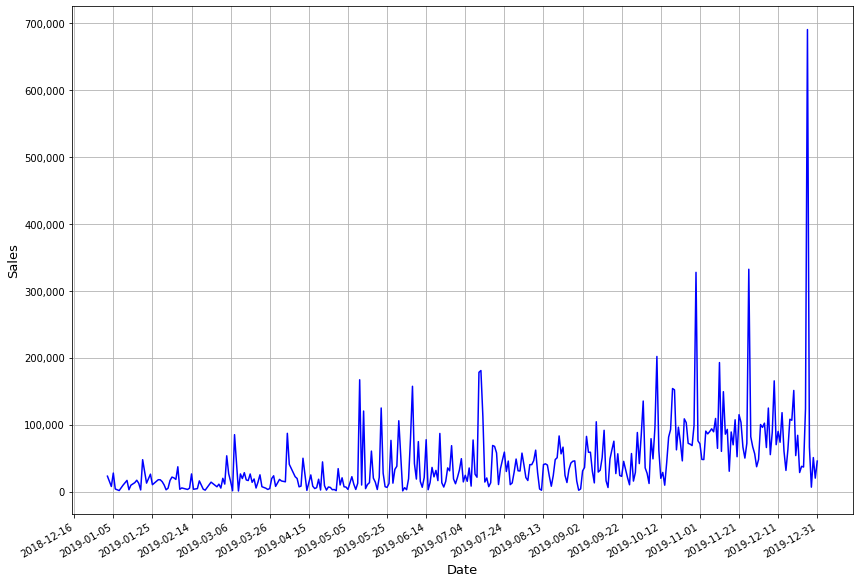

In [220]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(12,9))

half_year_locator = mdates.DayLocator(interval=20)
year_month_formatter = mdates.DateFormatter("%Y-%m-%d")

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)

plt.plot(day_rental_summary.index, day_rental_summary['total_amount'],color='b')
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Sales', fontsize = 13)
plt.grid()
plt.tight_layout()

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.gcf().autofmt_xdate()
plt.show()

<AxesSubplot:ylabel='rent_channel'>

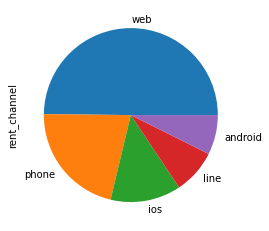

In [221]:
rent_channel = df.groupby('rent_channel')['rent_channel'].count().sort_values(ascending=False)
rent_channel.plot(kind='pie')

Chennel that they use to rent the car the most is website, and phone 

In [222]:
price_brand_model = pd.pivot_table(df, index=['car__brand', 'car__model'], values='price_per_day', aggfunc='mean').head(10)

In [223]:
price_brand_model.sort_values('price_per_day',ascending=False)

price_per_day
car__brand car__model                 
BMW        520i          300000.000000
Bentley    Continental    30000.000000
           Flying spur    27000.000000
BMW        Series 7       12000.000000
           Series 5        7134.454827
Audi       TT S            6300.000000
BMW        X3              4700.000000
           Series 3        4385.477692
           X1              3982.352941
           Series 1        2000.000000

In [224]:
df.groupby('day_name')['day_name'].count().sort_values(ascending=False)

day_name
Friday       563
Thursday     546
Monday       512
Wednesday    471
Tuesday      457
Saturday     296
Sunday       276
Name: day_name, dtype: int64

Friday had the highest number of car rentals, followed by Thursday and Monday. 

In [225]:
df1 = df[['total_period', 'price_per_day','discount_amount','promotion_amount','total_amount']]

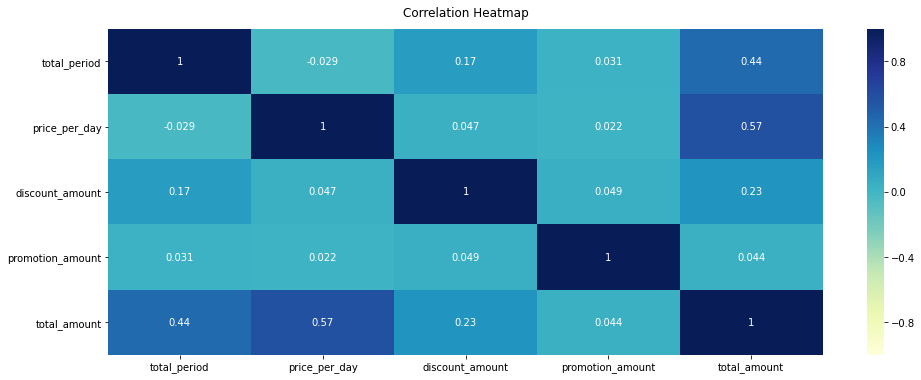

In [226]:
plt.figure(figsize=(16, 6))
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df1.corr(), vmin = -1 , vmax =1, annot=True, cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad = 12);

In [234]:
table2 = pd.pivot_table(df, index = ['status'], values = ['total_amount'], aggfunc = 'sum')

In [235]:
table2

,total_amount
status,
cancel,1.436167e+06
complete,1.338117e+07
failed,3.752000e+03
success,7.174749e+05


In [263]:
df[df['status'] == 'cancel']

,created_at,order_id,rent_channel,payment_method,car,car__owner__user_status,car__brand,car__model,rental_category,total_period,...,total_amount,status,Dates,Time,year,month,day_name,car_num,car_name,day
15,2019-12-29 15:51:00,DM5932-26001,ios,credit,5932:Honda Accord,local,Honda,Accord,car,2.0,...,5136.0,cancel,2019-12-29,15:51:00,2019,12,Sunday,5932,Honda Accord,29
16,2019-12-29 12:07:00,DM5170-25990,android,cash,5170:Toyota Yaris,private,Toyota,Yaris,car,3.0,...,2568.0,cancel,2019-12-29,12:07:00,2019,12,Sunday,5170,Toyota Yaris,29
21,2019-12-29 03:53:00,DM5698-25971,ios,cash,5698:Toyota Yaris,private,Toyota,Yaris,car,2.0,...,1712.0,cancel,2019-12-29,03:53:00,2019,12,Sunday,5698,Toyota Yaris,29
28,2019-12-27 15:39:00,DM4792-25882,ios,credit,4001:Mitsubishi Xpander,private,Mitsubishi,Xpander,car,3.0,...,7704.0,cancel,2019-12-27,15:39:00,2019,12,Friday,4001,Mitsubishi Xpander,27
43,2019-12-26 13:38:00,DM3625-25786,web,credit,3625:BMW Series 5,private,BMW,Series 5,car,5.0,...,64311.0,cancel,2019-12-26,13:38:00,2019,12,Thursday,3625,BMW Series 5,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,2019-08-11 14:32:00,DM4686-17031,web,transfer,4686:Toyota Altis,private,Toyota,Altis,car,1.0,...,1284.0,cancel,2019-08-11,14:32:00,2019,8,Sunday,4686,Toyota Altis,11
2366,2019-07-30 22:58:00,DM4875-16498,web,credit,4875:Toyota Fortuner,private,Toyota,Fortuner,car,2.0,...,4001.8,cancel,2019-07-30,22:58:00,2019,7,Tuesday,4875,Toyota Fortuner,30
2683,2019-06-21 17:13:00,DM4582-14901,phone,transfer,4582:Toyota Vios,private,Toyota,Vios,car,3.0,...,2568.0,cancel,2019-06-21,17:13:00,2019,6,Friday,4582,Toyota Vios,21
2898,2019-05-12 19:55:00,DM4242-13824,web,credit,4242:Honda HR-V,member,Honda,HR-V,car,1.0,...,2439.6,cancel,2019-05-12,19:55:00,2019,5,Sunday,4242,Honda HR-V,12
